In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [12]:
week_days_path = "./paris_weekdays.csv"
week_ends_path = "./paris_weekends.csv"

paris_weekdays = pd.read_csv(week_days_path, index_col=0)
paris_weekends = pd.read_csv(week_ends_path, index_col=0)


In [13]:
print(paris_weekdays.head())

      realSum        room_type  room_shared  room_private  person_capacity  \
0  296.159940     Private room        False          True              2.0   
1  288.237487     Private room        False          True              2.0   
2  211.343089     Private room        False          True              2.0   
3  298.956100  Entire home/apt        False         False              2.0   
4  247.926181  Entire home/apt        False         False              4.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0               True      0    0                10.0   
1               True      0    0                10.0   
2              False      0    0                10.0   
3              False      0    1                 9.0   
4              False      0    0                 7.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        97.0         1  0.699821    0.193709  518.478947   
1                        97.0         1 

In [6]:
paris_weekdays.shape

(3130, 20)

# Missing values

In [38]:
print(paris_weekdays.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [39]:
print(paris_weekends.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


No missing values??? :)

# Outlier detection

In [25]:
def get_outlier_rows(dataframe, column_name):
    data = dataframe[column_name]
    mean = np.mean(data)
    std = np.std(data)

    lower_3sigma = mean - 3 * std
    upper_3sigma = mean + 3 * std

    outlier_mask = (data < lower_3sigma) | (data > upper_3sigma)

    return dataframe[outlier_mask]

In [26]:
def plot_distribution_with_outliers(dataframe, column_name):
    data = dataframe[column_name]
    outlier_rows = get_outlier_rows(dataframe, column_name)
    outlier_values = outlier_rows[column_name]

    stats = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std': np.std(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75),
        'min': np.min(data),
        'max': np.max(data)
    }

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='All data')
    ax1.hist(outlier_values, bins=10, alpha=0.9, color='red', edgecolor='black', label='Outliers')
    ax1.axvline(stats['mean'], color='green', linestyle='--', label=f"Mean: {stats['mean']:.2f}")
    ax1.axvline(stats['median'], color='orange', linestyle='--', label=f"Median: {stats['median']:.2f}")
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Distribution of {column_name}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.boxplot(data, vert=True, patch_artist=True)
    ax2.scatter([1]*len(outlier_values), outlier_values, color='red', alpha=0.6, label='Outliers')
    ax2.set_title(f'Box plot of {column_name}')
    ax2.set_ylabel(column_name)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nStatistics for {column_name}:")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['median']:.2f}")
    print(f"Std Dev: {stats['std']:.2f}")
    print(f"Q1 (25%): {stats['q1']:.2f}")
    print(f"Q3 (75%): {stats['q3']:.2f}")
    print(f"Range: [{stats['min']:.2f}, {stats['max']:.2f}]")
    print(f"Number of outliers: {len(outlier_values)} ({len(outlier_values)/len(data)*100:.2f}%)")

    return stats

# Weekends outlier analysis


Analyzing: realSum
Found 58 outlier rows
Outlier rows (first 5):
         realSum  rest_index_norm  attr_index_norm
78   1187.435921        46.288281        17.787645
87   1274.349893        58.202114        30.264666
95   1169.959922        52.728603        19.027262
97   1193.261255        61.458788        32.218235
116  1170.192935        63.365555        32.644091


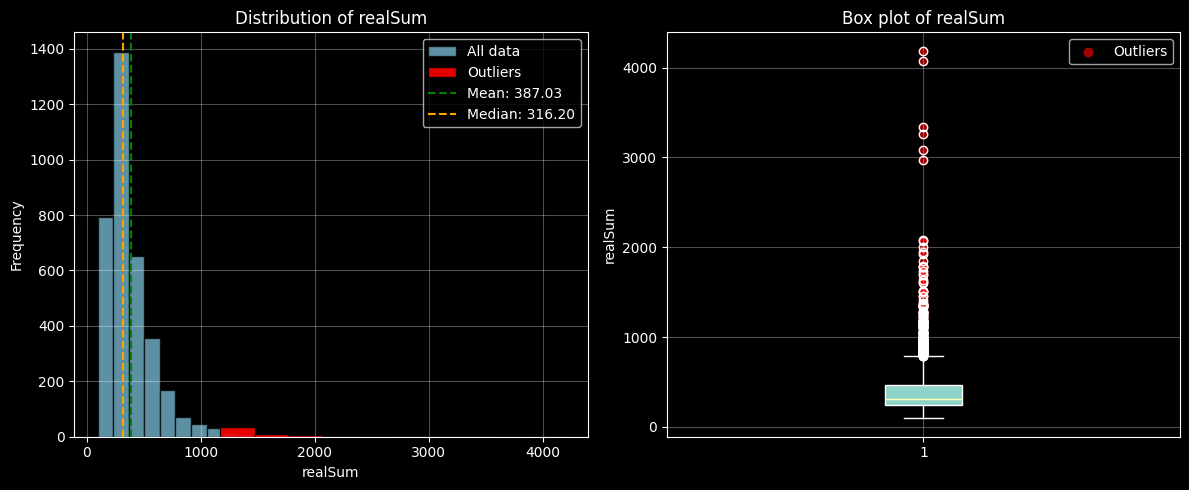


Statistics for realSum:
Mean: 387.03
Median: 316.20
Std Dev: 260.04
Q1 (25%): 240.99
Q3 (75%): 461.13
Range: [95.30, 4188.41]
Number of outliers: 58 (1.63%)

Analyzing: rest_index_norm
Found 4 outlier rows
Outlier rows (first 5):
         realSum  rest_index_norm  attr_index_norm
712   776.633423        80.526294        39.664704
1129  950.461366        78.512654        34.722161
1143  324.587566       100.000000        29.610499
1729  753.332091        91.318797        16.830509


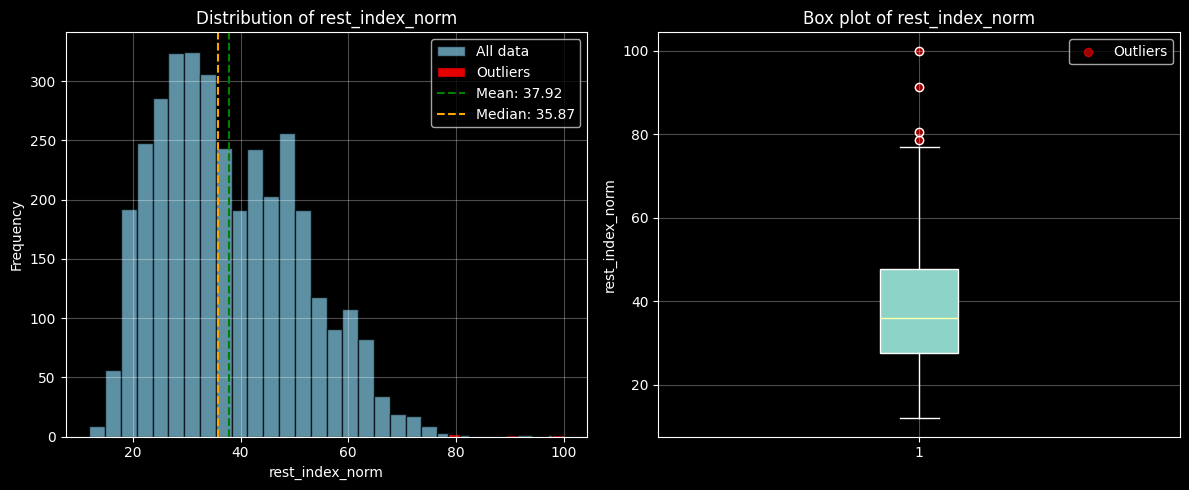


Statistics for rest_index_norm:
Mean: 37.92
Median: 35.87
Std Dev: 13.05
Q1 (25%): 27.61
Q3 (75%): 47.71
Range: [11.93, 100.00]
Number of outliers: 4 (0.11%)

Analyzing: attr_index_norm
Found 30 outlier rows
Outlier rows (first 5):
       realSum  rest_index_norm  attr_index_norm
4   266.334234        62.189313        49.279502
8   527.076149        50.555039        47.044137
66  596.514121        48.509248        67.927461
80  298.723087        58.953898        42.596966
92  706.729425        53.669390        41.709569


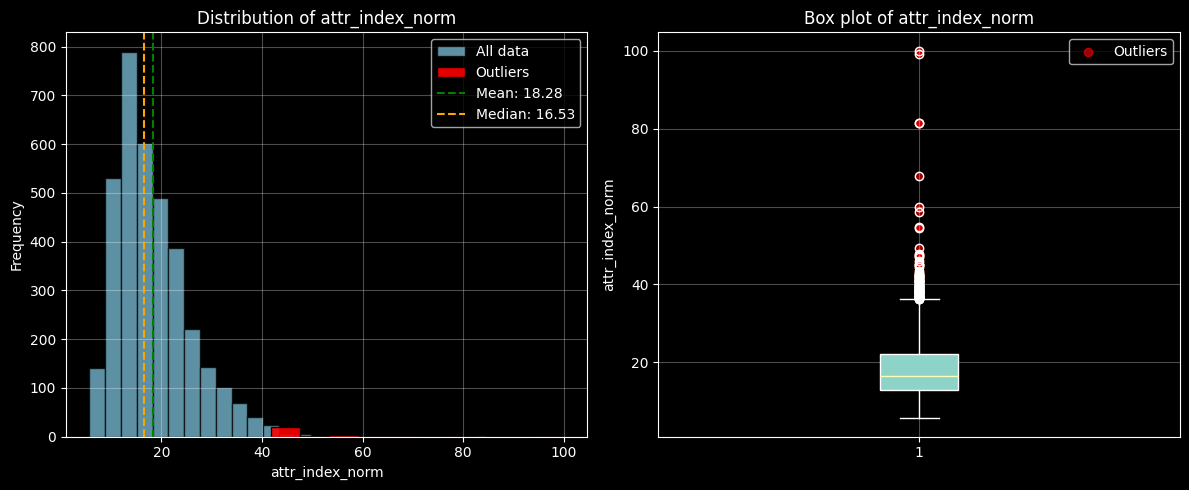


Statistics for attr_index_norm:
Mean: 18.28
Median: 16.53
Std Dev: 7.78
Q1 (25%): 12.86
Q3 (75%): 22.20
Range: [5.65, 100.00]
Number of outliers: 30 (0.84%)


In [28]:
columns = ['realSum', 'rest_index_norm', 'attr_index_norm']

for col in columns:
    print(f"\n{'='*60}")
    print(f"Analyzing: {col}")
    print(f"{'='*60}")

    outliers = get_outlier_rows(paris_weekends, col)
    print(f"Found {len(outliers)} outlier rows")
    if len(outliers) > 0:
        print("Outlier rows (first 5):")
        print(outliers[['realSum', 'rest_index_norm', 'attr_index_norm']].head())

    stats = plot_distribution_with_outliers(paris_weekends, col)

# Weekdays outlier analysis


Analyzing: realSum
Found 22 outlier rows
Outlier rows (first 5):
         realSum  rest_index_norm  attr_index_norm
231  3081.834281        76.431624        41.154499
299  1660.452978        76.520334        25.827678
395  1778.124709        57.450594        25.057949
414  1894.398360        71.388826        22.956361
420  1778.124709        67.141072        27.339201


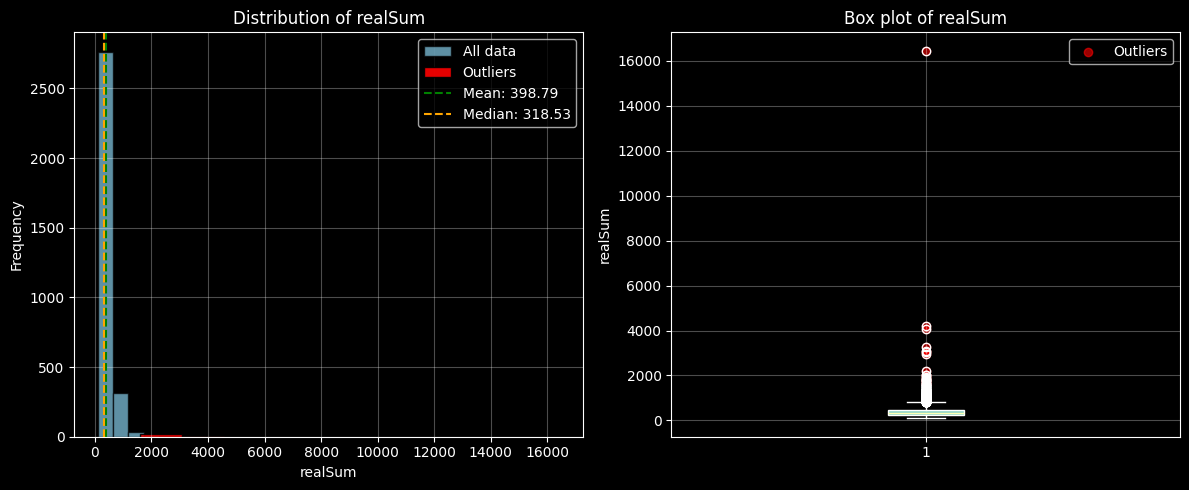


Statistics for realSum:
Mean: 398.79
Median: 318.53
Std Dev: 396.30
Q1 (25%): 240.00
Q3 (75%): 463.46
Range: [92.74, 16445.61]
Number of outliers: 22 (0.70%)

Analyzing: rest_index_norm
Found 2 outlier rows
Outlier rows (first 5):
         realSum  rest_index_norm  attr_index_norm
1016  950.461366       100.000000        34.761248
1518  753.332091        99.190762        16.849654


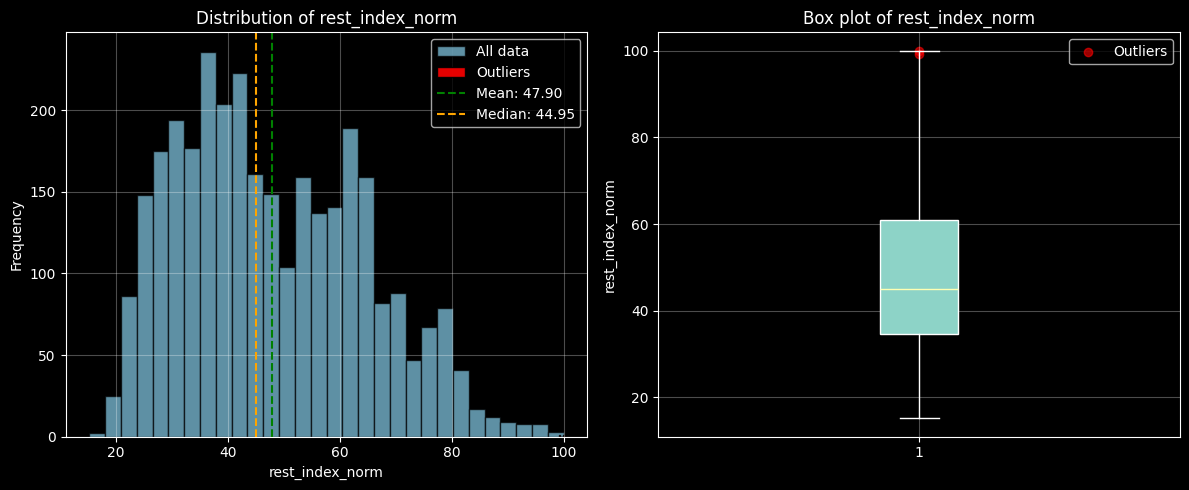


Statistics for rest_index_norm:
Mean: 47.90
Median: 44.95
Std Dev: 16.69
Q1 (25%): 34.52
Q3 (75%): 60.97
Range: [15.20, 100.00]
Number of outliers: 2 (0.06%)

Analyzing: attr_index_norm
Found 27 outlier rows
Outlier rows (first 5):
         realSum  rest_index_norm  attr_index_norm
1     288.237487        58.791463        42.507907
5     527.076149        64.392839        47.096508
66    577.873054        61.787279        68.007435
115   347.422873        58.958427       100.000000
142  1362.428931        73.732166        81.545099


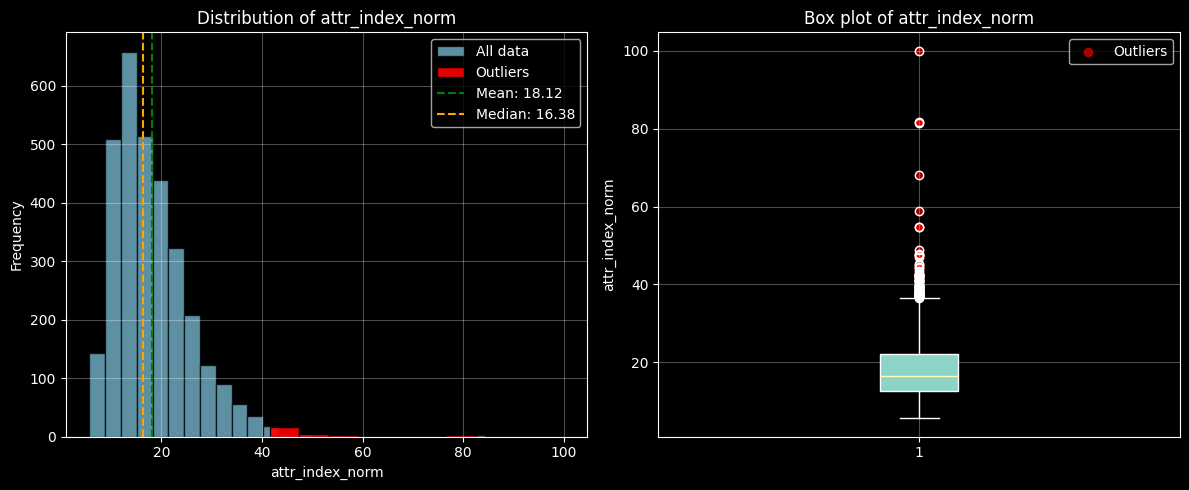


Statistics for attr_index_norm:
Mean: 18.12
Median: 16.38
Std Dev: 7.73
Q1 (25%): 12.61
Q3 (75%): 22.19
Range: [5.66, 100.00]
Number of outliers: 27 (0.86%)


In [29]:
columns = ['realSum', 'rest_index_norm', 'attr_index_norm']

for col in columns:
    print(f"\n{'='*60}")
    print(f"Analyzing: {col}")
    print(f"{'='*60}")

    outliers = get_outlier_rows(paris_weekdays, col)
    print(f"Found {len(outliers)} outlier rows")
    if len(outliers) > 0:
        print("Outlier rows (first 5):")
        print(outliers[['realSum', 'rest_index_norm', 'attr_index_norm']].head())

    stats = plot_distribution_with_outliers(paris_weekdays, col)

# Correlation between realSum and attr_index_norm and rest_index_norm

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_correlations_with_outlier_filter(df, dataset_name):
    variables = ['dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm']

    print(f"\n{'='*60}")
    print(f"Correlation Analysis: {dataset_name}")
    print(f"{'='*60}")

    correlations = {}
    for var in variables:
        if var in df.columns:
            corr = df['realSum'].corr(df[var])
            correlations[var] = corr
            print(f"realSum vs {var:20} : {corr:+.4f}")

    realSum_threshold = df['realSum'].quantile(0.95)
    df_filtered = df[df['realSum'] <= realSum_threshold].copy()

    print(f"\nFor visualization: Filtered out top 5% of realSum values")
    print(f"Original data points: {len(df)}")
    print(f"Filtered data points: {len(df_filtered)}")
    print(f"realSum range in filtered data: [{df_filtered['realSum'].min():.2f}, {df_filtered['realSum'].max():.2f}]")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for idx, var in enumerate(variables):
        if var in df.columns:
            ax = axes[idx]

            sns.scatterplot(data=df_filtered, x=var, y='realSum',
                          alpha=0.6, s=40, ax=ax, color='steelblue')

            ax.set_xlabel(var, fontsize=11, fontweight='bold')
            ax.set_ylabel('realSum', fontsize=11, fontweight='bold')

            corr_val = correlations[var]
            ax.text(0.05, 0.95, f'r = {corr_val:+.3f}',
                   transform=ax.transAxes, fontsize=12, fontweight='bold',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

            x_min, x_max = df_filtered[var].min(), df_filtered[var].max()
            y_min, y_max = df_filtered['realSum'].min(), df_filtered['realSum'].max()

            x_padding = (x_max - x_min) * 0.05
            y_padding = (y_max - y_min) * 0.05

            ax.set_xlim(x_min - x_padding, x_max + x_padding)
            ax.set_ylim(y_min - y_padding, y_max + y_padding)

            ax.grid(True, alpha=0.3, linestyle='--')

    plt.suptitle(f'Correlation Analysis: {dataset_name}\n(Filtered: realSum ≤ {realSum_threshold:.2f})',
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    print(f"\nSummary for {dataset_name}:")
    sorted_corrs = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    for var, corr in sorted_corrs:
        strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
        direction = "positive" if corr > 0 else "negative"
        print(f"  - {var:20}: {strength} {direction} correlation ({corr:+.3f})")

    return correlations, df_filtered

ANALYZING CORRELATIONS WITH OUTLIER FILTERING

Correlation Analysis: Paris Weekends
realSum vs dist                 : -0.1399
realSum vs metro_dist           : -0.0187
realSum vs attr_index_norm      : +0.3161
realSum vs rest_index_norm      : +0.2731

For visualization: Filtered out top 5% of realSum values
Original data points: 3558
Filtered data points: 3381
realSum range in filtered data: [95.30, 800.40]


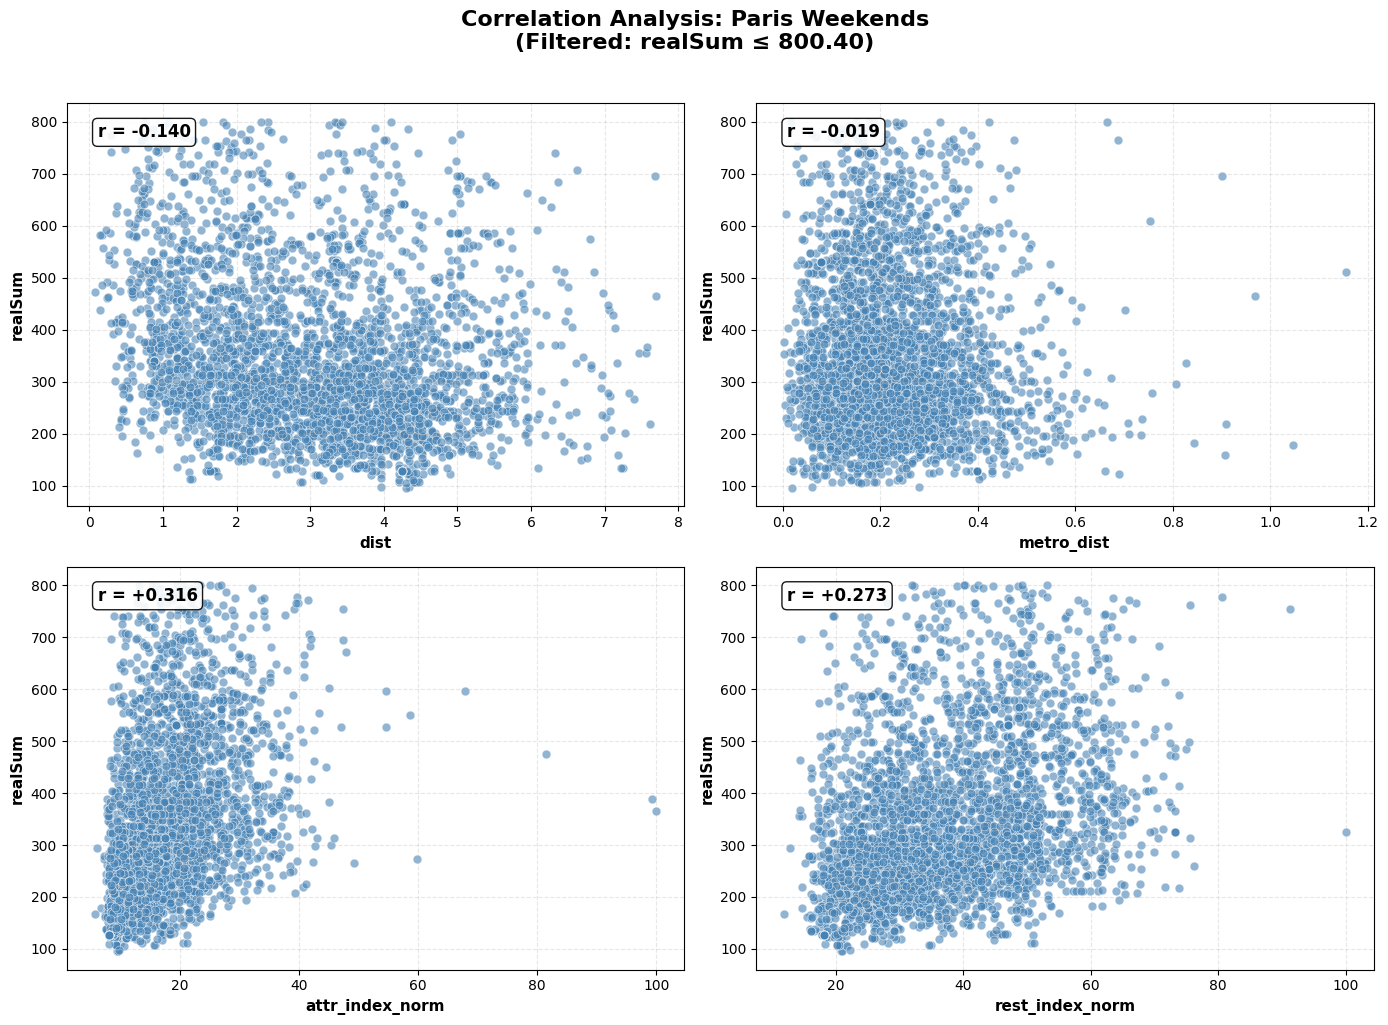


Summary for Paris Weekends:
  - attr_index_norm     : moderate positive correlation (+0.316)
  - rest_index_norm     : weak positive correlation (+0.273)
  - dist                : weak negative correlation (-0.140)
  - metro_dist          : weak negative correlation (-0.019)

Correlation Analysis: Paris Weekdays
realSum vs dist                 : -0.0734
realSum vs metro_dist           : -0.0326
realSum vs attr_index_norm      : +0.2154
realSum vs rest_index_norm      : +0.1760

For visualization: Filtered out top 5% of realSum values
Original data points: 3130
Filtered data points: 2973
realSum range in filtered data: [92.74, 847.24]


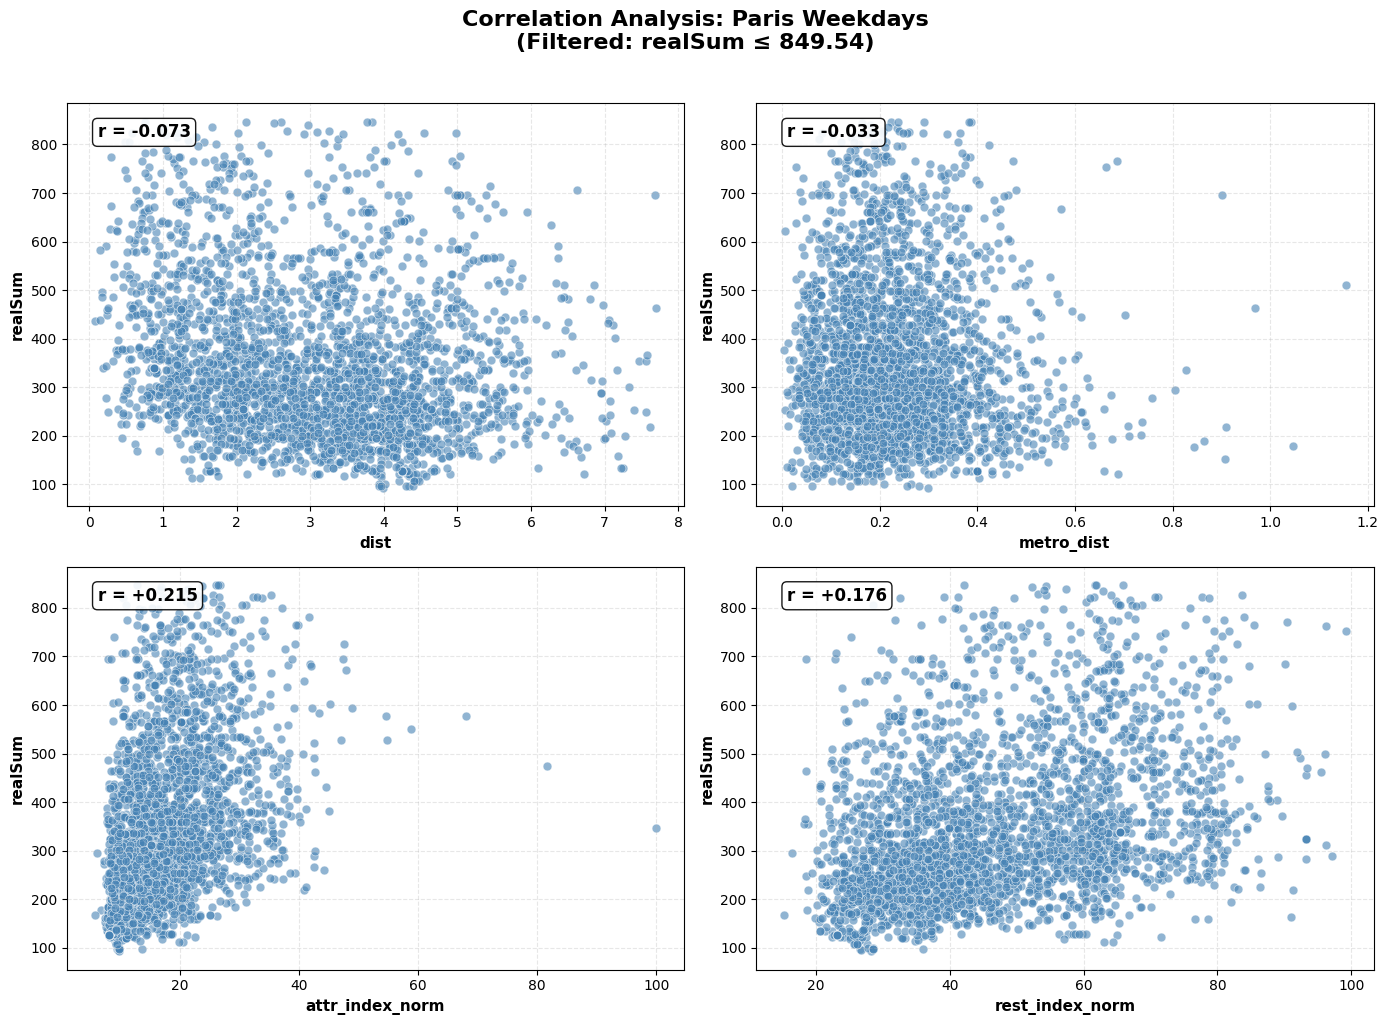


Summary for Paris Weekdays:
  - attr_index_norm     : weak positive correlation (+0.215)
  - rest_index_norm     : weak positive correlation (+0.176)
  - dist                : weak negative correlation (-0.073)
  - metro_dist          : weak negative correlation (-0.033)

CORRELATION COMPARISON: Weekend vs Weekday

Correlation Coefficients (using all data):
       Variable  Weekend_Corr  Weekday_Corr  Difference
           dist       -0.1399       -0.0734     -0.0665
     metro_dist       -0.0187       -0.0326     +0.0139
attr_index_norm       +0.3161       +0.2154     +0.1007
rest_index_norm       +0.2731       +0.1760     +0.0971


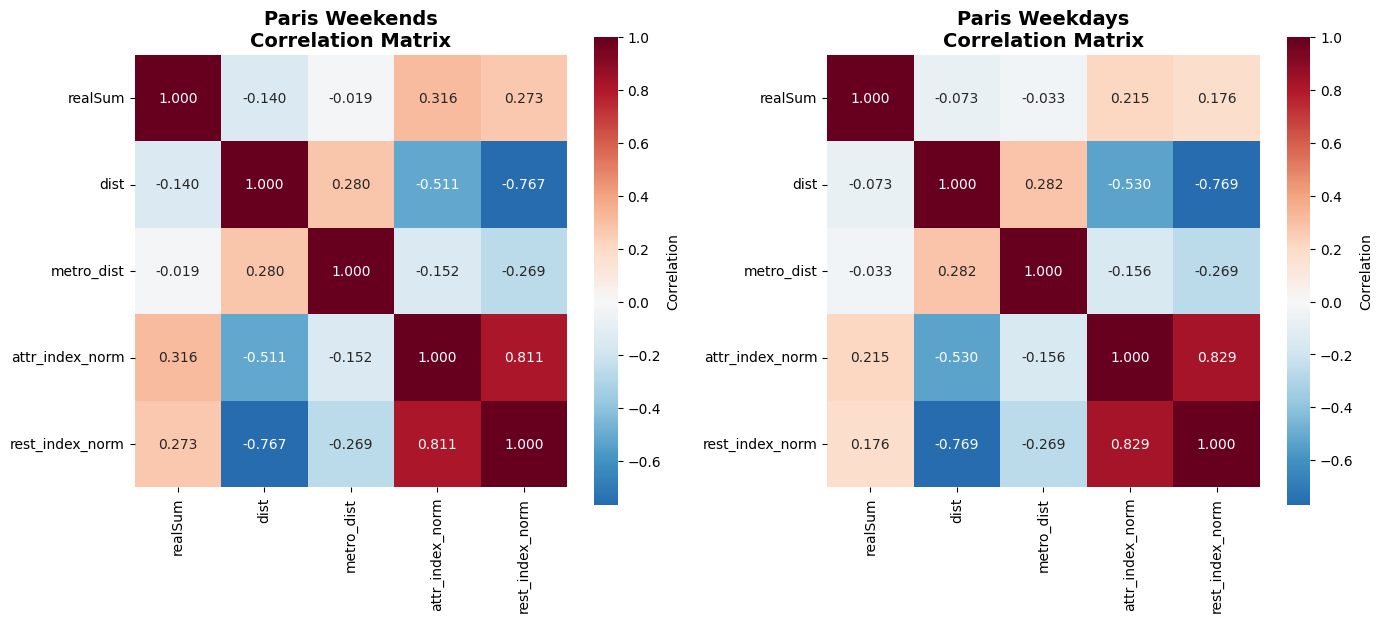


KEY FINDINGS:
1. Largest difference: attr_index_norm (Δ = +0.101)
2. Correlation strength interpretation:
   • ±0.00 to ±0.30: Weak
   • ±0.30 to ±0.50: Moderate
   • ±0.50 to ±1.00: Strong


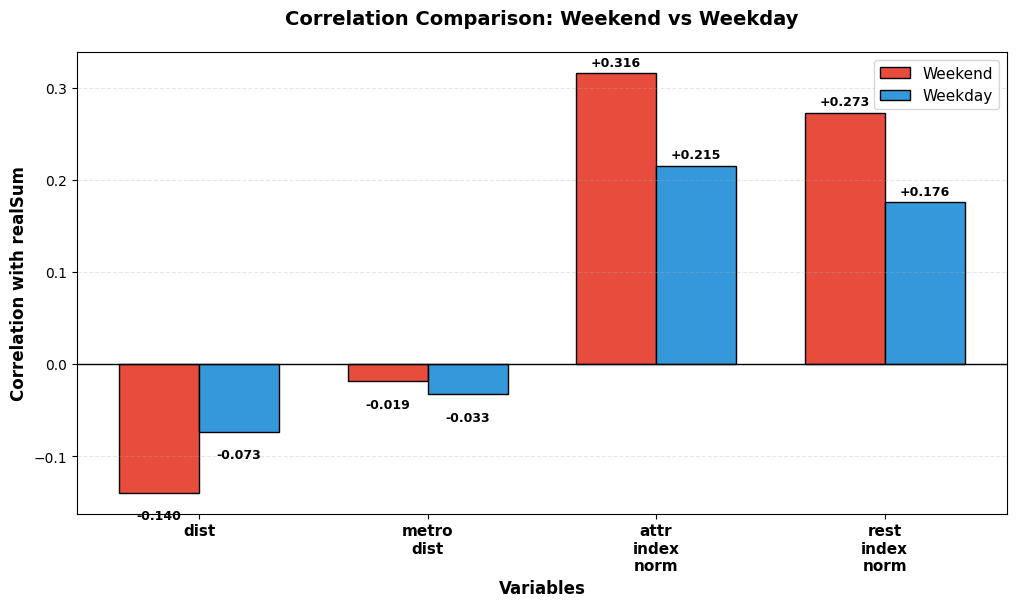

In [37]:
print("ANALYZING CORRELATIONS WITH OUTLIER FILTERING")
print("="*60)

weekend_corrs, weekend_filtered = analyze_correlations_with_outlier_filter(paris_weekends, "Paris Weekends")
weekday_corrs, weekday_filtered = analyze_correlations_with_outlier_filter(paris_weekdays, "Paris Weekdays")

print(f"\n{'='*60}")
print("CORRELATION COMPARISON: Weekend vs Weekday")
print(f"{'='*60}")

variables = ['dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm']
comparison_data = []

for var in variables:
    if var in weekend_corrs and var in weekday_corrs:
        weekend_corr = weekend_corrs[var]
        weekday_corr = weekday_corrs[var]
        diff = weekend_corr - weekday_corr
        comparison_data.append([var, weekend_corr, weekday_corr, diff])

comparison_df = pd.DataFrame(comparison_data,
                            columns=['Variable', 'Weekend_Corr', 'Weekday_Corr', 'Difference'])

print("\nCorrelation Coefficients (using all data):")
print(comparison_df.to_string(index=False, float_format=lambda x: f"{x:+.4f}"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

weekend_matrix = paris_weekends[['realSum'] + variables].corr()
sns.heatmap(weekend_matrix, annot=True, fmt='.3f', cmap='RdBu_r',
           center=0, square=True, cbar_kws={'label': 'Correlation'},
           ax=ax1)
ax1.set_title('Paris Weekends\nCorrelation Matrix', fontsize=14, fontweight='bold')

weekday_matrix = paris_weekdays[['realSum'] + variables].corr()
sns.heatmap(weekday_matrix, annot=True, fmt='.3f', cmap='RdBu_r',
           center=0, square=True, cbar_kws={'label': 'Correlation'},
           ax=ax2)
ax2.set_title('Paris Weekdays\nCorrelation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(variables))
width = 0.35

weekend_vals = [weekend_corrs.get(v, 0) for v in variables]
weekday_vals = [weekday_corrs.get(v, 0) for v in variables]

bars1 = ax.bar(x - width/2, weekend_vals, width, label='Weekend',
              color='#E74C3C', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, weekday_vals, width, label='Weekday',
              color='#3498DB', edgecolor='black', linewidth=1)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:+.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3 if height >= 0 else -12),
                   textcoords="offset points",
                   ha='center', va='bottom' if height >= 0 else 'top',
                   fontsize=9, fontweight='bold')

ax.set_xlabel('Variables', fontsize=12, fontweight='bold')
ax.set_ylabel('Correlation with realSum', fontsize=12, fontweight='bold')
ax.set_title('Correlation Comparison: Weekend vs Weekday',
            fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([v.replace('_', '\n') for v in variables],
                  fontsize=11, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

max_diff_var = comparison_df.loc[abs(comparison_df['Difference']).idxmax(), 'Variable']
max_diff = comparison_df.loc[abs(comparison_df['Difference']).idxmax(), 'Difference']

print(f"\n{'='*60}")
print("KEY FINDINGS:")
print(f"{'='*60}")
print(f"1. Largest difference: {max_diff_var} (Δ = {max_diff:+.3f})")
print("2. Correlation strength interpretation:")
print("   • ±0.00 to ±0.30: Weak")
print("   • ±0.30 to ±0.50: Moderate")
print("   • ±0.50 to ±1.00: Strong")